## Exploration

This notebook provides a brief introduction to the CLAD-C benchmark, a classification standard for continual learning utilizing a sequence of time-ordered images. A chronological sequence generates constant, yet authentic distribution shifts in both the label and domain distributions. The image below illustrates the changes in distribution throughout the sequence. The x-axis represents the time during which the images are presented. One example of a distribution shift occurs between
and
, which takes place at night. Observing the classes present during this time, you'll notice a significant decrease in pedestrians and cyclists. A similar occurrence happens during other nights or when the car travels on the highway. Additionally, the tricycle appears most frequently in Guangzhou and is less prevalent in other cities. Apart from these examples, there are numerous other smaller distribution shifts that may not be easily discernible in this plot.

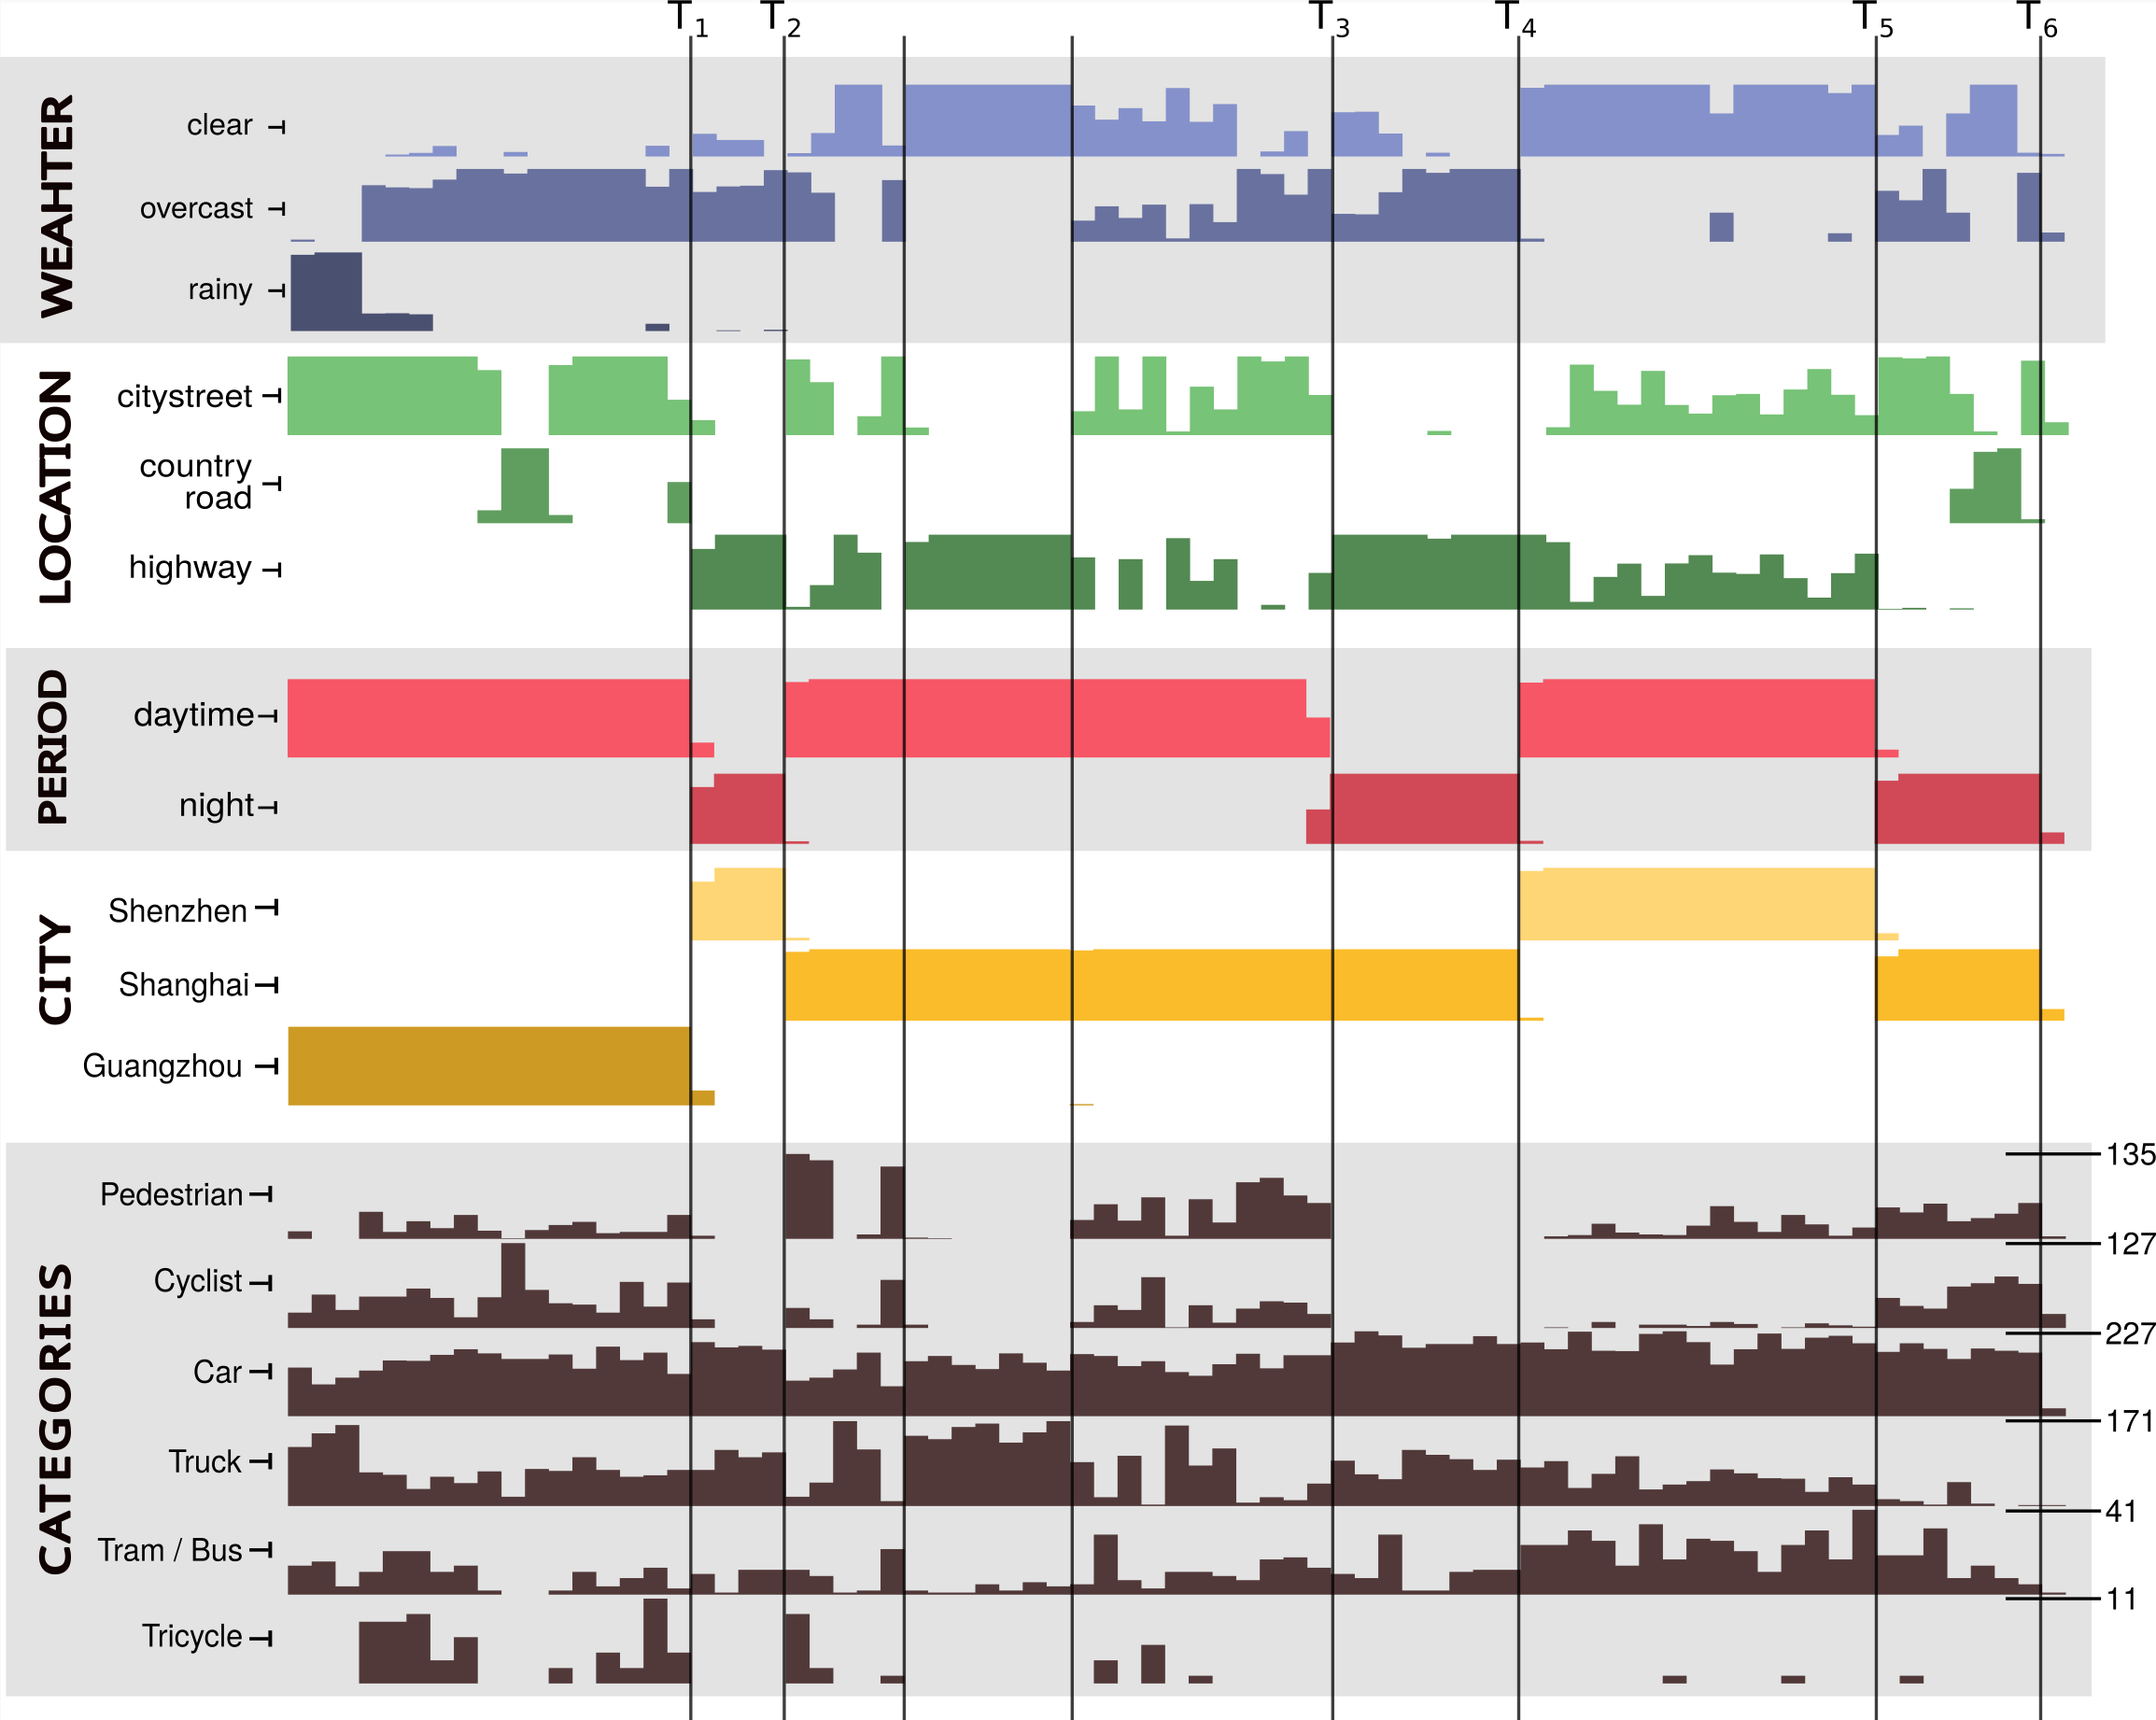

In [ ]:

import sys
# sys.path.insert(1, './CLAD/')
import os
import clad
import numpy as np
import matplotlib.pyplot as plt

import torch
from matplotlib.patches import Rectangle
from torchvision import transforms, datasets
from dataclasses import dataclass, field, InitVar
from typing import List
from rich import print
from sentence_transformers import SentenceTransformer, util
from PIL import Image
from torch.utils.data import ConcatDataset 
from torchvision.utils import draw_bounding_boxes
from torchvision.utils import make_grid
from collections import defaultdict

import clad
import torchvision

root = "./data"
original_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.3252, 0.3283, 0.3407), (0.0265, 0.0241, 0.0252))

])

all_train_sets = clad.get_cladc_train(root, transform=original_transform)
# val_sets = clad.get_cladc_val(root, transform=torchvision.transforms.ToTensor())
print(len(all_train_sets))
print([len(ts) for ts in all_train_sets])



In [ ]:
categories = {
    1: {"name":"Pedestrian", "color": 'red'},
    2: {"name":"Cyclist", "color": 'green'},
    3: {"name":"Car", "color": 'yellow'},
    4: {"name":"Truck", "color": 'white'},
    5: {"name":"Tram (Bus)", "color": 'orange'},
    6: {"name":"Tricycle", "color": 'blue'}
}

x = img*255
x = x.to(torch.uint8)
y = pair[1]

boxes = y['boxes']
labels = y['labels'].detach().numpy()
names = [categories[l]['name'] for l in labels]
colors = [categories[l]['color'] for l in labels]

result = draw_bounding_boxes(x, boxes, colors=colors,
                             labels=names, width=3)
transforms.ToPILImage()(result)